## Plot schematic SED for bremsstrahlung

In [4]:
import sys, os, pdb, glob
import numpy as np
import matplotlib.pyplot as plt
from planck import *
%matplotlib inline

In [5]:
def brem(lnu,T,EM,theta):
    nu_GHz = 10**(lnu-9)
    tau = 0.08235 * nu_GHz**(-2.1) * T**(-1.35) * EM     # cgs
    Omega = np.pi * (theta/57.3)**2
    Jy = 1e-23
    ftau = 1 - exp(-tau)
    lotau = tau < 1e-10 
    ftau[lotau] = tau[lotau]
    #return(planck_nu(1e9*nu_GHz,T).cgs.value * (1-exp(-tau)) * Omega / Jy)
    return(planck_nu(1e9*nu_GHz,T).cgs.value * ftau * Omega / Jy)


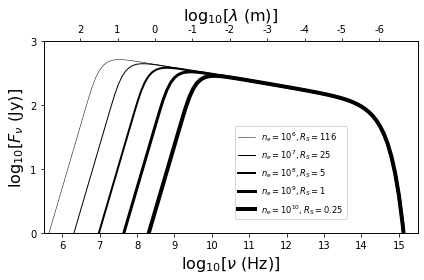

In [6]:
nsteps = 100
lnu_min = 5.5
lnu_max = 15.5
dlnu = (lnu_max - lnu_min)/nsteps
lnu = np.arange(lnu_min,lnu_max,dlnu)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("log$_{10}$[$\\nu$ (Hz)]", fontsize=16)
ax1.set_ylabel("log$_{10}$[$F_\\nu$ (Jy)]", fontsize=16)

T = 1e4       # K

ne = 1        # cm-3
R  = 116.129     # pc
EM = 2*ne**2*R         # cm-3 pc
theta = 57.3 * R/1600  # deg
F_nu = brem(lnu,T,EM,theta)
ax1.plot(lnu, np.log10(F_nu), 'k-', lw=0.5, label=r'$n_e=10^6, R_S=116$')

ne = 10
R  = 25
EM = 2*ne**2*R
theta = 57.3 * R/1600
F_nu = brem(lnu,T,EM,theta)
ax1.plot(lnu, np.log10(F_nu), 'k-', lw=1, label=r'$n_e=10^7, R_S=25$')

ne = 100
R  = 5.386
EM = 2*ne**2*R
theta = 57.3 * R/1600
F_nu = brem(lnu,T,EM,theta)
ax1.plot(lnu, np.log10(F_nu), 'k-', lw=2, label=r'$n_e=10^8, R_S=5$')

ne = 1e3
R  = 1.160
EM = 2*ne**2*R
theta = 57.3 * R/1600
F_nu = brem(lnu,T,EM,theta)
ax1.plot(lnu, np.log10(F_nu), 'k-', lw=3, label=r'$n_e=10^9, R_S=1$')

ne = 1e4
R  = 0.250
EM = 2*ne**2*R
theta = 57.3 * R/1600
F_nu = brem(lnu,T,EM,theta)
ax1.plot(lnu, np.log10(F_nu), 'k-', lw=4, label=r'$n_e=10^{10}, R_S=0.25$')

ax1.legend(loc='lower left', bbox_to_anchor=(0.5, 0.05), fontsize='small')

ax2 = ax1.twiny()
logwave = np.log10(3e8) - lnu
ax2.plot(logwave,logwave*0+999)
ax2.set_xlabel('log$_{10}$[$\\lambda$ (m)]', fontsize=16)

x1 = 5.5
x2 = 15.5
x1u = np.log10(3e8) - x1
x2u = np.log10(3e8) - x2

x_labels = ['6','7','8','9','10','11','12','13','14','15']
x_loc = np.array([float(x) for x in x_labels])
ax1.set_xticks(x_loc)
ax1.set_xticklabels(x_labels)
ax1.set_xlim(x1,x2)

x_labels = ['2','1','0','-1','-2','-3','-4','-5','-6']
x_loc = np.array([float(x) for x in x_labels])
ax2.set_xticks(x_loc)
ax2.set_xticklabels(x_labels)
ax2.set_xlim(x1u,x2u)

ax2.set_ylim(0,3)
y_labels = ['0','1','2','3']
y_loc = np.array([float(y) for y in y_labels])
ax1.set_yticks(y_loc)
ax1.set_yticklabels(y_labels)

fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('bremsstrahlung_sed.pdf')
